Yiting Wang 4646909520

In [17]:
import numpy as np, pandas as pd 
data = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')  #open xlsx file

b(i) How many rows are in this data set? How many columns? What do the rows and columns represent?

There are 9568 rows and 5 columns. 
The columns represent features of Combined Cycle Power Plant. 
The rows represent data of Combined Cycle Power Plant in a time.

b(ii) 

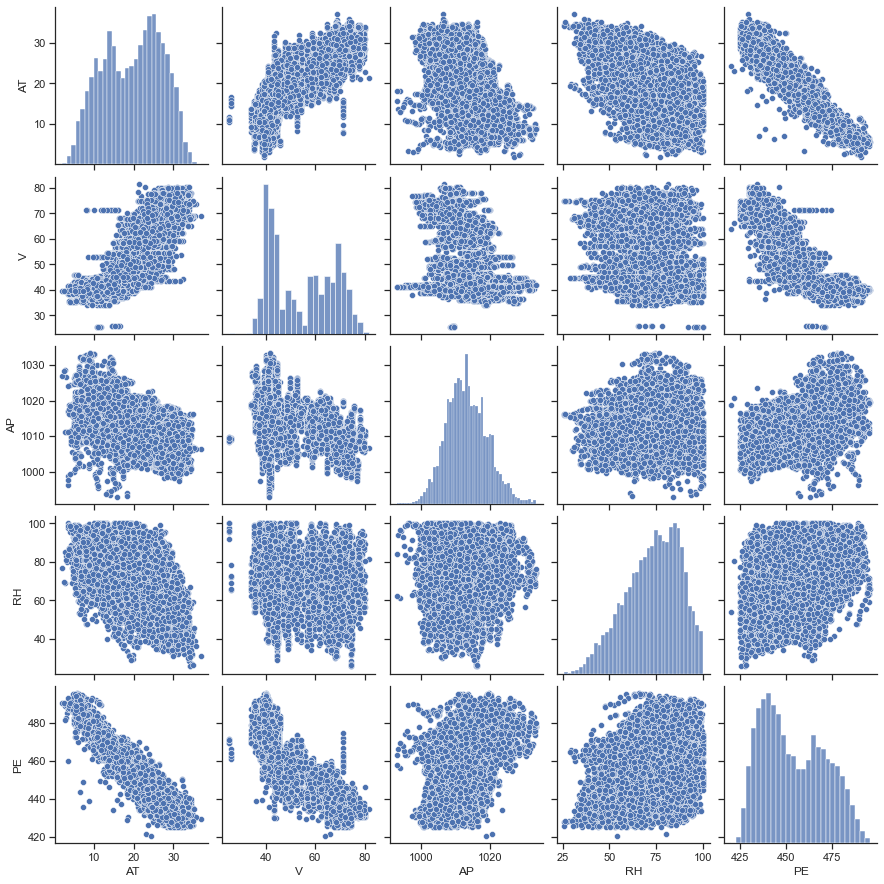

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")
sns.pairplot(data)               #draw the scatterplot
plt.show()

I found that there are negative correlations between predictors 'AT', 'V' and dependent variable 'PE'.

b(iii) 

In [ ]:
description =  pd.DataFrame(np.zeros((6,5)))            #Create a table to summarize
description.columns = data.columns
description.index = ['mean','median','range', 'first quartiles','third quartiles','interquartile']

for i in data.columns:
    variable = []
    variable.append(np.mean(data[i]))                                        #Calculate the mean of each variable
    variable.append(np.median(data[i]))                                      #Calculate the median of each variable
    variable.append(np.amax(data[i])-np.amin(data[i]))                       #Calculate the range of each variable
    variable.append(np.percentile(data[i],25))                               #Calculate the first quartile of each variable
    variable.append(np.percentile(data[i],75))                               #Calculate the third quartile of each variable
    variable.append(np.percentile(data[i],75) - np.percentile(data[i],25))   #Calculate the interquartile range of each variable
    description[i] = variable

print(description)

(c) 

In [ ]:
#Simple Linear Regression Model
import statsmodels.api as sm
import statsmodels.tools.eval_measures as ste
X = data.drop(columns = ['PE'])
y = data['PE']

def Reg(X,y):
    X = sm.add_constant(X)                       #Add an constant matrix
    model = sm.OLS(y, X).fit()                    
    y_pred = model.predict(X)                    #Calculate the prediction of Y
    coef = model.params.values[1:]               #Calculate the coefficients of the model
    MSE = ste.mse(y_pred, y, axis=0)             #Calculate the MSE
    print(model.summary())
    return y_pred, coef, MSE

In [ ]:
#AT Model 
AT = np.array(data['AT']).reshape(-1, 1)         #Predictor AT
yPred_AT, AT_coef, _ = Reg(AT,y) 

import matplotlib.pyplot as plt                   
plt.scatter(AT, y, color='black')
plt.plot(AT, yPred_AT, color='red')
plt.xlabel('AT')
plt.ylabel('y') 
plt.title('Simple Linear Regression')
plt.show()

#V Model
V = np.array(data['V']).reshape(-1, 1)           #Predictor V
yPred_V, V_coef, _  = Reg(V,y)

plt.scatter(V, y, color='black')
plt.plot(V, yPred_V, color='red')
plt.xlabel('V')
plt.ylabel('y') 
plt.title('Simple Linear Regression')
plt.show()

#AP Model
AP = np.array(data['AP']).reshape(-1, 1)           #Predictor AP
yPred_AP, AP_coef, _  = Reg(AP,y)

plt.scatter(AP, y, color='black')
plt.plot(AP, yPred_AP, color='red')
plt.xlabel('AP')
plt.ylabel('y') 
plt.title('Simple Linear Regression')
plt.show()


#RH Model
RH = np.array(data['RH']).reshape(-1, 1)           #Predictor RH
yPred_RH, RH_coef, _  = Reg(RH,y)

plt.scatter(RH, y, color='black')
plt.plot(RH, yPred_RH, color='red')
plt.xlabel('RH')
plt.ylabel('y') 
plt.title('Simple Linear Regression')
plt.show()

There are negative linear correlations between predictors 'AT', 'V' and dependent variable 'PE'. As for AP and RH models, there are not any obvious relationships between predictors and dependent variable.
There a statistically significant association between the predictor and the response in the AT and V model. 
In the above chart, there are several points that fall too far from the model. These are outliners, and then I use cook distances to find the outliers. 

In [ ]:
#Use cook distance to find the outliers
def cook_distance(X, y):
    X = sm.add_constant(X)                       #Add an constant matrix
    model = sm.OLS(y, X).fit()                    
    influence = model.get_influence()            #create instance of influence
    cook_distance = influence.cooks_distance     #obtain Cook's distance for each observation
    (distance, p_value) = cook_distance
    
    threshold = 4/len(y)                         #threshold = 4/n 
    influencial_data = distance[distance > threshold]
    return influencial_data

#AT 
AT_cooks = cook_distance(AT, y)
print('AT Outliers:', AT_cooks)

#V
V_cooks = cook_distance(V, y)
print('V Outliers:', V_cooks)

#AP
AP_cooks = cook_distance(AP, y)
print('V Outliers:', AP_cooks)

#RH
RH_cooks = cook_distance(RH, y)
print('RH Outliers:', RH_cooks)

(d)

In [ ]:
_, multi_coef, _ = Reg(X,y)

According to the result, we can reject H0 for all of the predictors.

(e)

In [ ]:
#Univariate Regression Coefficients
uni_coef = [AP_coef, V_coef, AP_coef, RH_coef]                
print('Multiple Regression Coefficients',multi_coef)
print("Univariate Regression Coefficients",uni_coef)

x = [-3,-2,-1,0,1]
plt.plot(uni_coef, multi_coef,'o')                           #Plot the point
plt.plot(x,x)                                                #Plot y = x
plt.xlabel('Univariate Coefficients')
plt.ylabel('Multiple Coefficients') 
plt.title('Coefficients')
plt.show()

From the plot, univariate regression coefficients are totally different from the multiple regression coefficients except the predictor AT. When these predictors are joined into a model, they infulence each other and also there are not linear relationships between the predictor AP, RH and dependent variable PE. 

(f)

In [ ]:
#Construct [X,X^2,X^3]
def X_nonLinear(x):
    X_nonLinear = pd.DataFrame({'X':x,'X^2':x*x,'X^3':x*x*x})
    return X_nonLinear

#AT Nonlinear Model
X_AT = X_nonLinear(data['AT'])
_, _, _ = Reg(X_AT,y)

#V Nonlinear Model
X_V = X_nonLinear(data['V'])
_, _, _ = Reg(X_V,y)

#AP Nonlinear Model
X_AP = X_nonLinear(data['AP'])
_, _, _ = Reg(X_AP,y)

#RH Nonlinear Model
X_RH = X_nonLinear(data['RH'])
_, _, _ = Reg(X_RH,y)

Because R2 = 0.912 in the AT model and R2 = 0.775 in the V model, there is evidence of nonlinear association between AP, V and the response. 
I did find such relationships in the AP and RH model because R2 = 0.275 and 0.154.

(g)

In [ ]:
#Construct interaction of predictors
def X_interaction(x1,x2,x3,x4):
    dict = {'AT*V':x1*x2,'AT*AP':x1*x3,'AT*RH':x1*x4,'V*AP':x2*x3,'V*RH':x2*x4,'AP*RH':x3*x4}
    X_interaction = pd.DataFrame(dict)
    return X_interaction

X_interaction = X_interaction(data['AT'],data['V'],data['AP'],data['RH'])   #Construct the interaction of X
_, _, _ = Reg(X_interaction,y)

There is evidence of association of interactions of predictors with the response. 
According to the model, all of the interaction variables are statistically significant.

(h)

In [ ]:
from sklearn.model_selection import train_test_split
#Construct [X^2]
def X_2(x1,x2,x3,x4):
    X_2 = pd.DataFrame({'AT^2':x1*x1,'V^2':x2*x2,'AP^2':x3*x3,'RH^2':x4*x4})
    return X_2

X_2 = X_2(data['AT'],data['V'],data['AP'],data['RH'])    #Construct X^2

#AT, V, AP, RH, AT*V, AT*AP, AT*RH , V*AP , V*RH, AP*RH, AT^2, V^2, AP^2, RH^2 
X_mix = pd.concat([X, X_interaction, X_2], axis=1)
_, _, _ = Reg(X_mix, y)

According to the result, AT*AP, V*AP, V*RH, V^2 should be removed.

In [ ]:
#AT, V, AP, RH, AT*V, AT*RH, AP*RH, AT^2, AP^2, RH^2
X_train, X_test, y_train, y_test = train_test_split(X_mix, y, test_size=0.3, random_state=42)

X_interaction = X_interaction.drop(columns = ['AT*AP','V*AP','V*RH'])
X_2 = X_2.drop(columns = ['V^2'])
X_mix = pd.concat([X, X_interaction, X_2], axis=1)
_, _, _ = Reg(X_mix,y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_mix, y, test_size=0.3, random_state=42)
_, _, MSE_train = Reg(X_train,y_train)
_, _, MSE_test = Reg(X_test,y_test)

print('\n'*2)
print('Train MSE:', MSE_train)
print('Test MSE:', MSE_test)

(i)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor 
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.3, random_state=42)

#Create KNN Model to find optimal k*
def knn_modelK(k, X_train, y_train, X_test,y_test):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_error = 1 - knn.score(X_train, y_train)     #Calculate train errors
    test_error = 1 - knn.score(X_test, y_test)        #Calculate test errors
    return train_error, test_error

train_error_raw, test_error_raw= [],[]                   #Dataset of train and test errors

def best_fit(n, X_train, y_train, X_test,y_test):
    train_errorK, test_errorK = [],[]
    best_rate = best_k = 1                                #Define best test rate and best fit k
    k = [i for i in range(n,0,-1)] 
    
    for i in k:   
        train_error, test_error = knn_modelK(i, X_train, y_train, X_test, y_test)
        train_errorK.append(train_error)
        test_errorK.append(test_error)
        
        if test_error < best_rate:                    
            best_rate = test_error                         #Find best test rate
            best_k = i
    
    print('Best fit k:', best_k)
    print('Best rate:', best_rate)
    return train_errorK, test_errorK

train_error_raw, test_error_raw = best_fit(100, X_train_raw, y_train_raw, X_test_raw, y_test_raw)

import matplotlib.pyplot as plt                        #Plot train and test errors
x_k = [1/i for i in range(100,0,-1)]
plt.xlim(0,1)
plt.plot(x_k,train_error_raw,label='Train Errors')
plt.plot(x_k,test_error_raw,label='Test Errors')
plt.xlabel('1/k')
plt.ylabel('Error Rate') 
plt.title('Train and Test Errors with Raw Data')
plt.legend()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)                        #Calculate the normalized data
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y, test_size=0.3, random_state = 42)

train_error_norm, test_error_norm = best_fit(100, X_train_norm, y_train_norm, X_test_norm, y_test_norm)

plt.xlim(0,1)
plt.plot(x_k,train_error_norm,label='Train Errors')
plt.plot(x_k,test_error_norm,label='Test Errors')
plt.xlabel('1/k')
plt.ylabel('Error Rate') 
plt.title('Train and Test Errors with Normalized Data')
plt.legend()

(j)

In [ ]:
#Calculate the train and test MSEs of the best fit, that is when k = 5
from sklearn.metrics import mean_squared_error 
knn = KNeighborsRegressor(n_neighbors = 5).fit(X_train_raw, y_train_raw)
train_mse_raw = mean_squared_error(y_train_raw, knn.predict(X_train_raw))
test_mse_raw = mean_squared_error(y_test_raw, knn.predict(X_test_raw))
print('Train Mse with Raw Data:', train_mse_raw)
print('Test Mse with Raw Data:', test_mse_raw)

According to the results of MSEs, I find that the MSE of knn model is lower, which means the accuracy of knn model is higher.
Flexiable model is better to find a non-linear model. For this dataset, linear model may not be the most appropriate because I notice there are a lot of outliers, especially for the predictor 'AP' and 'RH'.

ISLR: 2.4.1

(a) The sample size n is extremely large, and the number of predictors p is small.

Worse. A flexible model will take full advantage of a large sample size (large n). So it works worse when the n is large and p is small.

(b) The number of predictors p is extremely large, and the number of observations n is small.

Better. Flexible method works better when p is extremely large and n is small.

(c) The relationship between the predictors and response is highly non-linear.

Better. A flexible model will be necessary to find the nonlinear effect. 

(d) The variance of the error terms, i.e. σ2 = Var(), is extremely high.

Worse. A flexible model will fit too much of the noise in the problem (when variance of the error terms is high), which means overfitting. So when the variance of the error terms is extremely high, a flexible model is not appropriate.

ISLR: 2.4.7

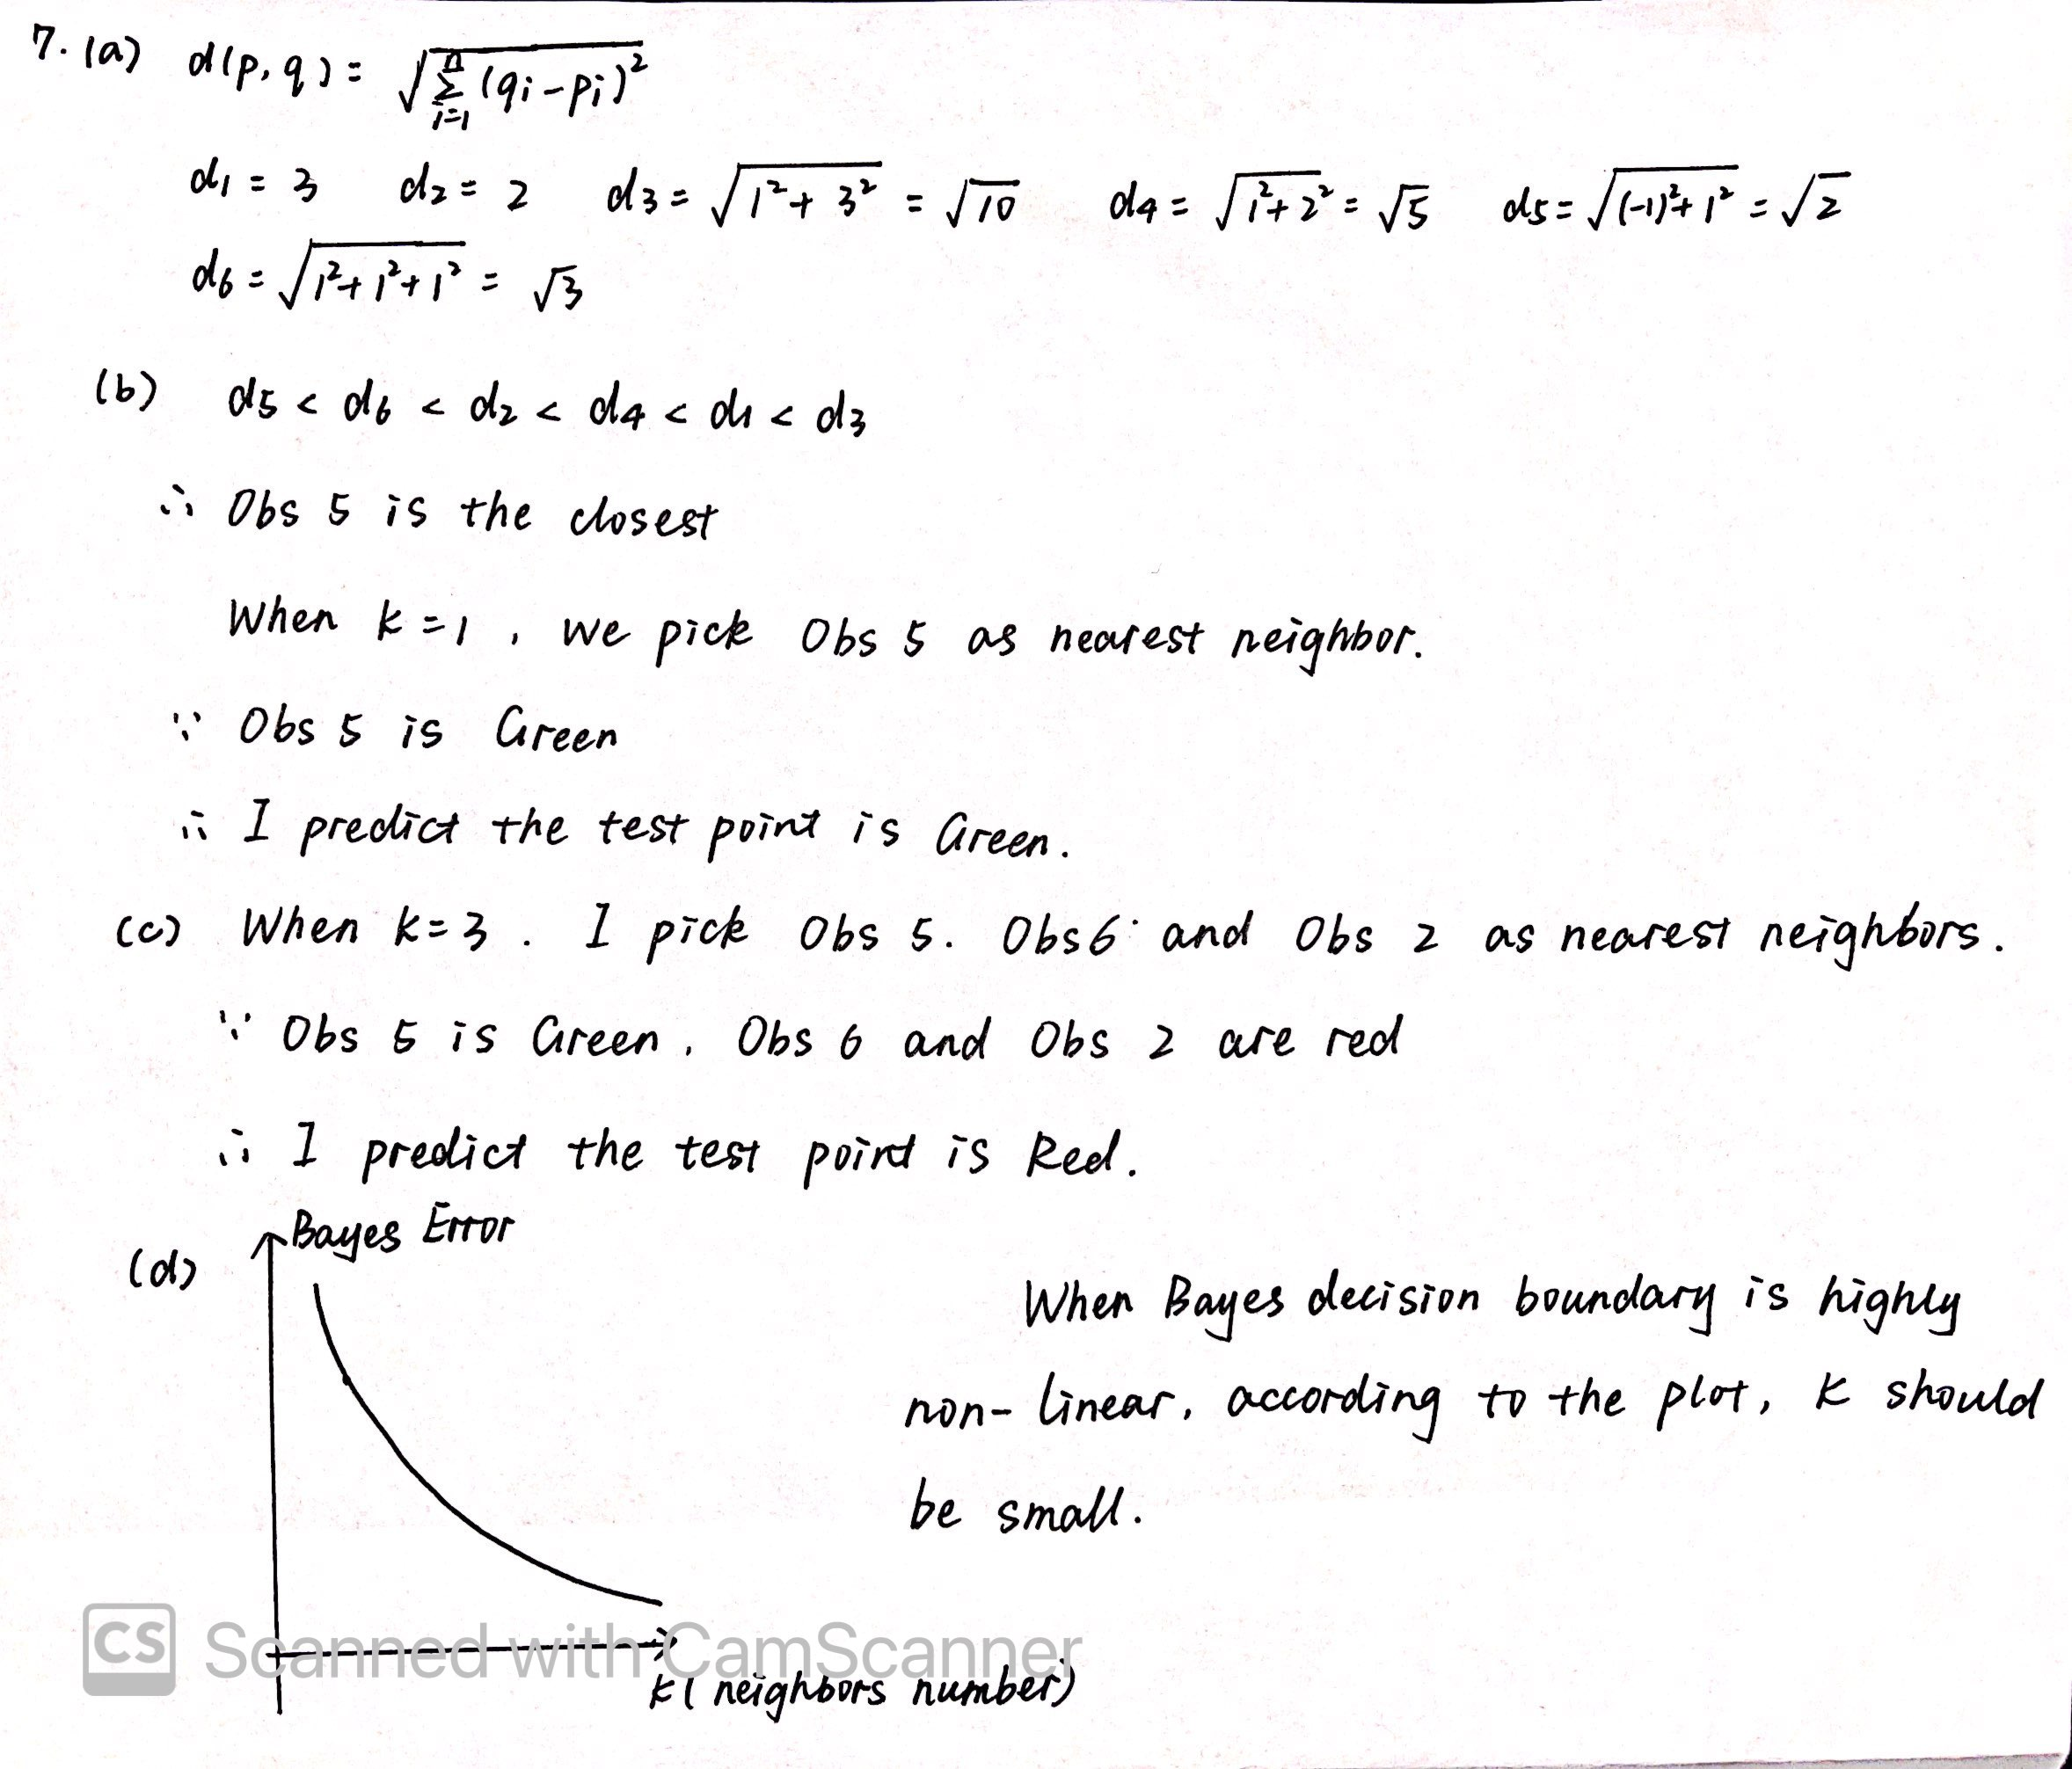